In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('web_scraping.csv')

In [4]:
df.head()

,avis,note
0,{'commentaire': 'Les plus: le choix même de l’...,2 étoiles : bas
1,"{'commentaire': ""J'ai commandé sur Amazon un c...",2 étoiles : bas
2,"{'commentaire': ""Je ne commande pas souvent su...",5 étoiles : excellent
3,"{'commentaire': ""Amazon, un grand moment !!! U...",5 étoiles : excellent
4,"{'commentaire': ""Mais que fait Amazon actuelle...",1 étoile : mauvais


In [5]:
# remplacer les valeurs manquantes par des NA
df['avis'].fillna('', inplace=True)

In [6]:
print(df['avis'].values)

["{'commentaire': 'Les plus: le choix même de l’inutile.... la livraison et conditions de remboursement: top, mais comme ce sont les fournisseurs qui paient, Amazon ne risque pas grand chose....Et le moins: ne jamais avoir à solliciter de SAV, vouloir entrer en contact avec un interlocuteur nada... Le summum de la déshumanisation... hélas tous les sites suivent cet exemple. Et nous pauvres consommateurs (en deux mots)  nous plongeons.'}"
 '{\'commentaire\': "J\'ai commandé sur Amazon un collier, Heureusement pas très cher, je l\'ai reçu rapidement, mais quelle ne fût pas ma surprise quand j\'ai regardé mon compte bancaire qui a été débité 3 fois de la somme. Malgré mes relances au service clients qui m\'assurent à chaque fois d\'un remboursement sous 48 heures, à ce jour je n\'ai toujours rien!! Ma commande date du mois de mars et nous sommes en juin"}'
 '{\'commentaire\': "Je ne commande pas souvent sur Amazon mais quand c\'est le cas, la livraison est toujours très rapide et les comm

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words='english') #les stop_words en anglais

# just send in all your docs here
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(df['avis'].values)# transforme une colonne par mot

In [ ]:
tfidf_vectorizer.get_stop_words()

In [9]:
# les vocabulaire que le modèle a retenu. il fait un traitement sur le texte. 
#par exemple supprime '@' devant virginamerica, remplace les majuscule en miniscule 
tfidf_vectorizer.vocabulary_

{'0794730': 0,
 '100': 1,
 '13': 2,
 '14': 3,
 '14h': 4,
 '20': 5,
 '2021': 6,
 '23': 7,
 '25': 8,
 '29': 9,
 '2h': 10,
 '30': 11,
 '3283399': 12,
 '33': 13,
 '406': 14,
 '48': 15,
 '50': 16,
 '580': 17,
 '60': 18,
 '80': 19,
 '96': 20,
 '99': 21,
 'abouti': 22,
 'abrite': 23,
 'absolument': 24,
 'accéder': 25,
 'achat': 26,
 'achats': 27,
 'actuellement': 28,
 'adresse': 29,
 'adressé': 30,
 'aguerris': 31,
 'ah': 32,
 'ai': 33,
 'aimerais': 34,
 'ainsi': 35,
 'allait': 36,
 'amazon': 37,
 'amerlock': 38,
 'anglais': 39,
 'angleterre': 40,
 'annoncé': 41,
 'annulé': 42,
 'annulée': 43,
 'années': 44,
 'apercois': 45,
 'appel': 46,
 'appelé': 47,
 'appliquée': 48,
 'apprend': 49,
 'apres': 50,
 'après': 51,
 'argent': 52,
 'arnaque': 53,
 'arrive': 54,
 'arriver': 55,
 'arrivé': 56,
 'arrêter': 57,
 'article': 58,
 'articles': 59,
 'assez': 60,
 'assurent': 61,
 'attends': 62,
 'au': 63,
 'aucun': 64,
 'aucune': 65,
 'aujourd': 66,
 'aussi': 67,
 'autant': 68,
 'autoportée': 69,
 'auto

In [10]:
# todense permet l'affichage de la matrice vu quelle contient assez de O
tfidf_vectorizer_vectors.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.09600352,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [11]:
tfidf_vectorizer_vectors

<6000x616 sparse matrix of type '<class 'numpy.float64'>'
	with 326700 stored elements in Compressed Sparse Row format>

In [12]:
tfidf_vectorizer_vectors.todense().shape

(6000, 616)

on a 6000 individus. un individu represente un avis et 616 mots. un mot correspond à une colonne.

In [13]:
type(tfidf_vectorizer_vectors), type(tfidf_vectorizer_vectors.todense())

(scipy.sparse.csr.csr_matrix, numpy.matrix)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = tfidf_vectorizer_vectors.todense()
y = df['note'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

clf = RandomForestClassifier(max_depth=2, random_state=5)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [18]:
print(clf.feature_importances_)

[0.         0.00392524 0.         0.00374544 0.0004633  0.
 0.         0.         0.         0.0058916  0.         0.
 0.         0.         0.         0.00538528 0.00093478 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0040021  0.         0.00182765 0.
 0.         0.         0.         0.01713699 0.00539643 0.
 0.         0.01003283 0.         0.         0.00434829 0.00473695
 0.         0.         0.01353514 0.         0.         0.00596298
 0.         0.         0.00378599 0.         0.         0.
 0.         0.00649159 0.         0.         0.         0.
 0.         0.00740997 0.         0.00396442 0.00355838 0.
 0.         0.         0.         0.         0.         0.01070664
 0.         0.         0.         0.         0.         0.00537866
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00440139
 0.00571486 0.         0.         0.         0.         0.
 0.         0.  

In [19]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = clf.predict(X_test)
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred))#, target_names=target_names))

                       precision    recall  f1-score   support

   1 étoile : mauvais       0.50      1.00      0.67       601
      2 étoiles : bas       0.00      0.00      0.00       127
     4 étoiles : bien       0.00      0.00      0.00        67
5 étoiles : excellent       0.00      0.00      0.00       405

             accuracy                           0.50      1200
            macro avg       0.13      0.25      0.17      1200
         weighted avg       0.25      0.50      0.33      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall=1, on predit tous les mauvais comme des avis mauvais.
 
Le problème est qu'on a plus d'avis mauvais que de bas, bien ou excellent. il faut donc augmenter le nombre d'avis bas, bien et excellent avec la methode de dataset_balance ou equilibrage les données

In [20]:
print(df[df['note'] == '1 étoile : mauvais'].shape)
print(df[df['note'] == '2 étoiles : bas'].shape)
print(df[df['note'] == '4 étoiles : bien'].shape)
print(df[df['note'] == '5 étoiles : excellent'].shape)

(3000, 2)
(600, 2)
(300, 2)
(2100, 2)


**rééquilibrons les classes**

In [25]:
from sklearn.utils import resample

# Separate majority and minority classes
df_mauvais=df[df['note'] == '1 étoile : mauvais']
df_bas=df[df['note'] == '2 étoiles : bas']
df_bien=df[df['note'] == '4 étoiles : bien']
df_excellent=df[df['note'] == '5 étoiles : excellent']

# Upsample minority class
df_bas_upsampled = resample(df_bas,
                                 replace=True,     # sample with replacement
                                 n_samples=df_mauvais.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

df_bien_upsampled = resample(df_bien,
                                 replace=True,     # sample with replacement
                                 n_samples=df_mauvais.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

df_excellent_upsampled = resample(df_excellent,
                                 replace=True,     # sample with replacement
                                 n_samples=df_mauvais.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_mauvais, df_bas_upsampled, df_bien_upsampled,df_excellent_upsampled])
 
# Display new class counts
print(df_upsampled.note.value_counts())

4 étoiles : bien         3000
1 étoile : mauvais       3000
2 étoiles : bas          3000
5 étoiles : excellent    3000
Name: note, dtype: int64


In [27]:
df_upsampled.shape

(12000, 2)

In [29]:
# Separate input features (X) and target variable (y)
y = df_upsampled.note.values
X = df_upsampled['avis'].values

In [30]:
# settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')

# just send in all your docs here
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(X)

X = tfidf_vectorizer_vectors.todense()
print(X.shape)

(12000, 616)


on a 12000 ligne pour 616 mots de vocabulaire soit 616 colonnes

**model radom forest**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

clf = RandomForestClassifier(max_depth=20, random_state=5)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

**Evaluation du modèle**

In [36]:
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

                       precision    recall  f1-score   support

   1 étoile : mauvais       0.22      0.17      0.19       607
      2 étoiles : bas       0.26      0.32      0.29       615
     4 étoiles : bien       0.27      0.16      0.20       587
5 étoiles : excellent       0.24      0.33      0.28       591

             accuracy                           0.24      2400
            macro avg       0.25      0.24      0.24      2400
         weighted avg       0.25      0.24      0.24      2400



la reponse n'est pas optimal, faut peut être augmenter la profondeur(max_depth) pour apprendre quelques choses

In [37]:
print(len(clf.feature_importances_))

616


**prise en compte de la taille des phrases**

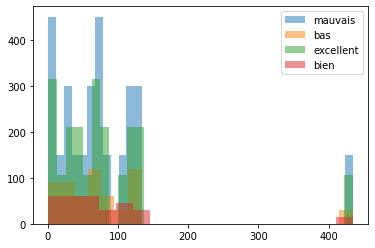

In [39]:
import matplotlib.pyplot as plt
df['len'] = df['avis'].apply(lambda x: len(x.split(' ')))
plt.hist(df[df['note'] == '1 étoile : mauvais']['len'].values, bins='auto', alpha=0.5, label='mauvais')#, normed=True)
plt.hist(df[df['note'] == '2 étoiles : bas']['len'].values, bins='auto', alpha=0.5, label='bas')#, normed=True)
plt.hist(df[df['note'] == '5 étoiles : excellent']['len'].values, bins='auto', alpha=0.5, label='excellent')#, normed=True)
plt.hist(df[df['note'] == '4 étoiles : bien']['len'].values, bins='auto', alpha=0.5, label='bien')#, normed=True)

plt.legend(loc='upper right')

histogramme de la taille des phrases. nombres de mots en abscisses et nombre de phrase en ordonné

In [41]:
import numpy as np

In [42]:
# ajoute ula taille des mots dans notre table
df_upsampled['len'] = df_upsampled['avis'].apply(lambda x: len(x.split(' ')))
X = np.hstack((X, df_upsampled['len'].values.reshape(X.shape[0],1)))

In [43]:
print(X)

[[  0.   0.   0. ...   0.   0. 131.]
 [  0.   0.   0. ...   0.   0. 111.]
 [  0.   0.   0. ...   0.   0.  79.]
 ...
 [  0.   0.   0. ...   0.   0.  23.]
 [  0.   0.   0. ...   0.   0. 120.]
 [  0.   0.   0. ...   0.   0. 111.]]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

                       precision    recall  f1-score   support

   1 étoile : mauvais       0.23      0.09      0.13       612
      2 étoiles : bas       0.27      0.15      0.19       624
     4 étoiles : bien       0.25      0.31      0.27       568
5 étoiles : excellent       0.25      0.47      0.33       596

             accuracy                           0.25      2400
            macro avg       0.25      0.25      0.23      2400
         weighted avg       0.25      0.25      0.23      2400



la taille des phrases améliore un peu notre modèle: accuracy=0,25

In [58]:
# les variables qui ont plus d'impact
print(len(clf.feature_importances_))
d = dict(zip(range(len(clf.feature_importances_)), clf.feature_importances_))
print(d[len(clf.feature_importances_)-1])
#print(tfidf_vectorizer.vocabulary_)

617
0.028838248521176654


In [60]:
inv_map = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}
s = sorted(d.items(), reverse=True, key=lambda x: x[1])
print(s[:10])
for i in s[:10]:
    print(inv_map[i[1]])

[(616, 0.028838248521176654), (171, 0.018922995194418136), (431, 0.01729908877541144), (229, 0.016108460111755738), (317, 0.014203938189612384), (402, 0.013959513529155398), (33, 0.013938112695771112), (138, 0.01364115742171294), (305, 0.012237394933885806), (523, 0.011256221013144376)]


KeyError: ignored

**les embedding**

In [62]:
#Universal Sentence Encoder
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
embed = hub.KerasLayer(module_url)
embeddings = embed(["A long sentence.", "single-word", "http://example.com"])
print(embeddings.shape)

(3, 128)


le probléme avec tfidf est qu'on a beaucoup de colonne et en plus on perd la sementique des mots. pour garder la sementique, il faut utiliser les embeding. peu importe le nombre des mots, Universal Sentence Encoder donne un vecteur de 128 colonnes. 

In [63]:
sentences_embeddings = embed(df['avis'].values)
print(sentences_embeddings.shape)

(6000, 128)


In [64]:
type(sentences_embeddings.numpy())

numpy.ndarray

In [65]:
from sklearn.utils import resample

# Separate majority and minority classes
df_mauvais=df[df['note'] == '1 étoile : mauvais']
df_bas=df[df['note'] == '2 étoiles : bas']
df_bien=df[df['note'] == '4 étoiles : bien']
df_excellent=df[df['note'] == '5 étoiles : excellent']

# Upsample minority class
df_bas_upsampled = resample(df_bas,
                                 replace=True,     # sample with replacement
                                 n_samples=df_mauvais.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

df_bien_upsampled = resample(df_bien,
                                 replace=True,     # sample with replacement
                                 n_samples=df_mauvais.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

df_excellent_upsampled = resample(df_excellent,
                                 replace=True,     # sample with replacement
                                 n_samples=df_mauvais.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_mauvais, df_bas_upsampled, df_bien_upsampled,df_excellent_upsampled])
 
# Display new class counts
print(df_upsampled.note.value_counts())

# Separate input features (X) and target variable (y)
y = df_upsampled.note.values
X = df_upsampled['avis'].values
sentences_embeddings = embed(X)
X = sentences_embeddings.numpy()
print(X.shape)

4 étoiles : bien         3000
1 étoile : mauvais       3000
2 étoiles : bas          3000
5 étoiles : excellent    3000
Name: note, dtype: int64
(12000, 128)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

                       precision    recall  f1-score   support

   1 étoile : mauvais       0.23      0.09      0.13       612
      2 étoiles : bas       0.27      0.15      0.19       624
     4 étoiles : bien       0.25      0.31      0.27       568
5 étoiles : excellent       0.25      0.47      0.33       596

             accuracy                           0.25      2400
            macro avg       0.25      0.25      0.23      2400
         weighted avg       0.25      0.25      0.23      2400



accuracy=0,25. notre modèle s'est pas déterioré en utilsant les embedding. or, on a que 128 colonnes au lieu de 616 dans le modèle précedent.

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, 'Semantic Textual Similarity')

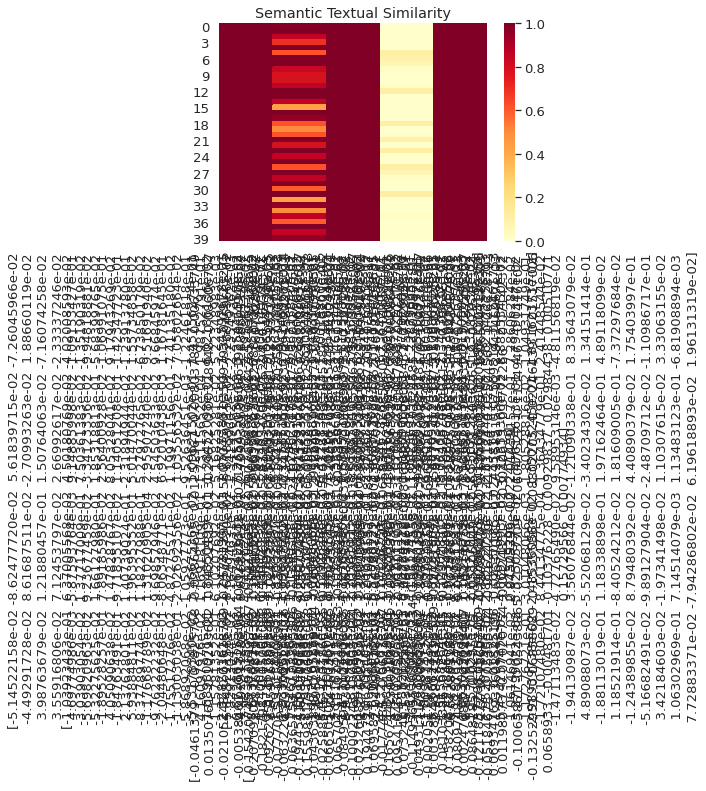

In [69]:
# afficher la corrélation des 10 premier exemple des avis mauvais, bas, bien et excellent
mauvais = df[df.note=='1 étoile : mauvais'].iloc[:10,:]#['text'].values[:10,:]
bas = df[df.note=='2 étoiles : bas'].iloc[:10,:]#['text'].values[:10,:]
bien = df[df.note=='4 étoiles : bien'].iloc[:10,:]#['text'].values[:10,:]
excellent = df[df.note=='5 étoiles : excellent'].iloc[:10,:]#['text'].values[:10,:]
sample_sentences = pd.concat([mauvais, bas, bien,excellent])['avis'].values
labels = ['mauvais', 'bas', 'bien','excellent','mauvais']
sample_sentences = embed(sample_sentences).numpy()
labels = embed(labels).numpy()
corr = np.inner(sample_sentences, labels)
sns.set(font_scale=1.2)
g = sns.heatmap(
    corr,
    #xticklabels=labels,
    #yticklabels=labels,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")
g.set_xticklabels(labels, rotation=90)
g.set_title("Semantic Textual Similarity")

In [71]:
# afficher le 2eme tweet
df[df.note=='1 étoile : mauvais'].iloc[1,:]

avis    {'commentaire': 'le produit casse au bout de 2...
note                                   1 étoile : mauvais
len                                                   111
Name: 5, dtype: object